**Bitcoin Price History**

This tutorial, inspired by https://notebooks.ai/notebooks-ai/sample-project-tutorial-742bde1f,  we're going to pull Bitcoin cryptocurrency prices from a public API and download them as Excel files. I need to import two libraries first: *requests*  (to pull data from the web) and *pandas* to process it. May require `pip install requests`

In [28]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from Cryptowatch (for reference, check their docs).

In [29]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Litecoin, the most popular cryptocurrencies, for the last 100 days:

In [30]:
last_100days = (pd.Timestamp.now() - pd.offsets.Day(100))
last_100days

Timestamp('2020-10-15 23:11:15.458447')

In [31]:
ltc = get_historic_price('ltc', 'bitstamp', after=last_100days)
ltc.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-01-23 14:00:00,137.01,139.17,136.61,138.52,2007.247714,278142.043345
2021-01-23 15:00:00,138.47,138.86,137.62,138.36,1053.336471,145523.168410
2021-01-23 16:00:00,138.23,139.52,138.23,139.12,1517.203016,210865.865104
2021-01-23 17:00:00,138.76,140.12,138.39,139.07,2114.416708,294253.712617
2021-01-23 18:00:00,139.01,139.72,139.01,139.57,252.433715,35164.288245


Let's plot it:

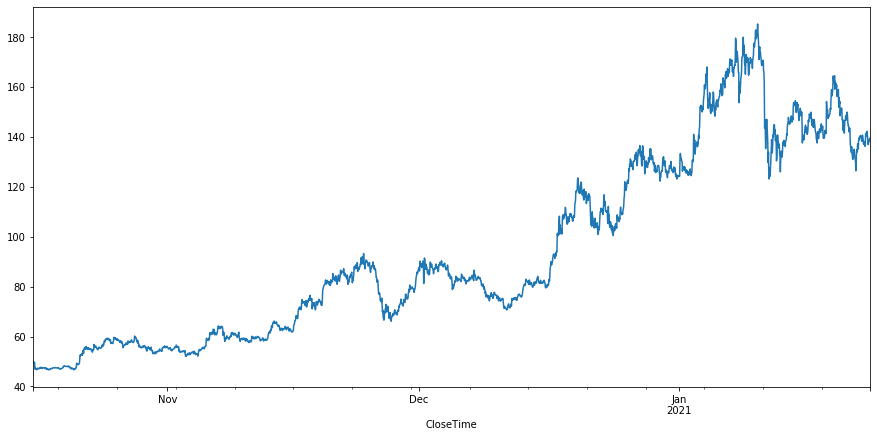

In [32]:
ltc['ClosePrice'].plot(figsize=(15, 7))

**Dynamic plots with Bokeh**

May need to `pip install bokeh`

In [33]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Crypto Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price $'
p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Litecoin')
p1.legend.location = "top_left"

show(p1)

Loading BokehJS ...

**Exporting to Excel**

In [34]:
writer = pd.ExcelWriter('Litecoin_history.xlsx')
btc.to_excel(writer, sheet_name='Litecoin')
writer.save()